# Perform Exploratory Data Analysis on 'Indian Premiere League'

Objective:

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\Ducat\project\kaggle\deliveries.csv")

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
df=df[df["batting_team"]!="Kochi Tuskers Kerala"]
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243813,1370353,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,MM Sharma,S Dube,1,0,1,NaN,0,NaN,NaN,NaN
243814,1370353,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243815,1370353,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,MM Sharma,S Dube,6,0,6,NaN,0,NaN,NaN,NaN


In [5]:
df=df[df["bowling_team"]!="Kochi Tuskers Kerala"]

Deccan Chargers was renames to Sunrisers Hyderabad. Delhi Daredevils was renamed to Delhi Capitals. Pune Warriors was rebranded to Rising Pune Supergiants.

In [6]:
def team_name_change(data):
    if data=="Delhi Daredevils":
        data="Delhi Capitals"
    elif data=="Deccan Chargers":
        data="Sunrisers Hyderabad"
    elif data=="Pune Warriors" or data=="Rising Pune Supergiant":
        data="Rising Pune Supergiants"
    elif data=="Gujarat Lions":
        data="Gujarat Titans"
    elif data=="Kings XI Punjab":
        data="Punjab Kings"
    return data

In [7]:
df["batting_team"]=df["batting_team"].apply(lambda x:team_name_change(x))
df["bowling_team"]=df["bowling_team"].apply(lambda x:team_name_change(x))

C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\3048131204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["batting_team"]=df["batting_team"].apply(lambda x:team_name_change(x))
C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\3048131204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bowling_team"]=df["bowling_team"].apply(lambda x:team_name_change(x))


In [8]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [9]:
df.replace(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals','Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals','Sunrisers Hyderabad', 'Chennai Super Kings','Rising Pune Supergiants', 'Gujarat Titans','Lucknow Super Giants'],['RCB','PK','DC','MI','KKR','RR','SRH','CSK','RPS','GT','LSG'],inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\2056828561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals','Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals','Sunrisers Hyderabad', 'Chennai Super Kings','Rising Pune Supergiants', 'Gujarat Titans','Lucknow Super Giants'],['RCB','PK','DC','MI','KKR','RR','SRH','CSK','RPS','GT','LSG'],inplace=True)


In [10]:
df.batting_team.unique()

array(['KKR', 'RCB', 'CSK', 'PK', 'RR', 'DC', 'MI', 'SRH', 'RPS', 'GT',
       'LSG'], dtype=object)

In [11]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,CSK,GT,14,2,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243813,1370353,2,CSK,GT,14,3,RA Jadeja,MM Sharma,S Dube,1,0,1,NaN,0,NaN,NaN,NaN
243814,1370353,2,CSK,GT,14,4,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243815,1370353,2,CSK,GT,14,5,RA Jadeja,MM Sharma,S Dube,6,0,6,NaN,0,NaN,NaN,NaN


# Total number of matches

In [12]:
print(len(df["match_id"].drop_duplicates()))

1010


# Total runs

In [13]:
print(sum(df["total_runs"]))

317898


# Net batting strike rate

In [14]:
print(sum(df["total_runs"])*100/len(df))

132.11565075367486


# Total wickets

In [15]:
print(sum(df["is_wicket"]))

11907


# Net bowling strike rate

In [16]:
print(len(df)/sum(df["is_wicket"]))

20.208364827412446


# Top 8 Highest Scoring Teams

In [17]:
# Group the dataset by the batting team's name
df10= df.groupby('batting_team')
df10

In [18]:
# Calculate the total runs scored by each team
df10 = df10['total_runs'].sum()
df10

batting_team
CSK    35822
DC     36326
GT     10579
KKR    36399
LSG     5027
MI     39426
PK     36932
RCB    37402
RPS    10740
RR     31892
SRH    37353
Name: total_runs, dtype: int64

In [19]:
# Sort the teams based on the total runs scored in descending order
df10 = df10.sort_values(ascending=False)
df10

batting_team
MI     39426
RCB    37402
SRH    37353
PK     36932
KKR    36399
DC     36326
CSK    35822
RR     31892
RPS    10740
GT     10579
LSG     5027
Name: total_runs, dtype: int64

In [20]:
df10=df10.head(8)

In [21]:
# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(df10,"\n")

Top 5 Highest Scoring Teams:
batting_team
MI     39426
RCB    37402
SRH    37353
PK     36932
KKR    36399
DC     36326
CSK    35822
RR     31892
Name: total_runs, dtype: int64 



In [22]:
# Create a pie chart
colors = ['blue', 'red', 'pink', 'purple', 'yellow','green','violet','orange']

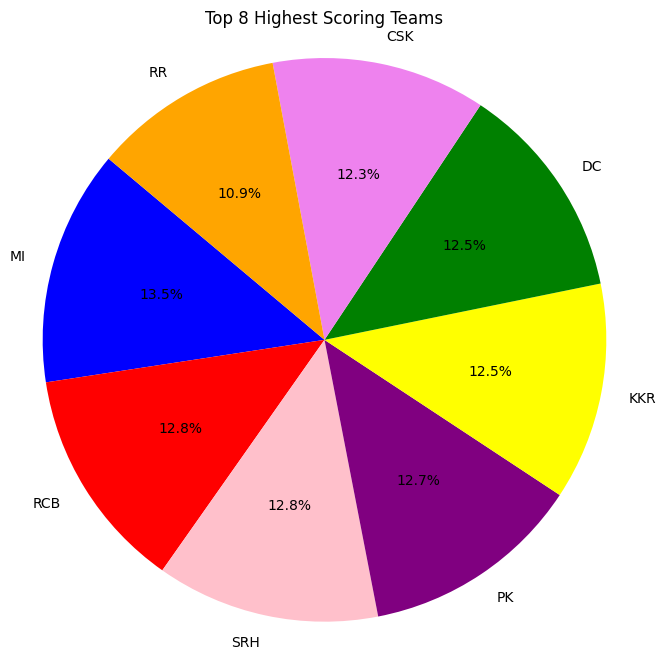

In [23]:
# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(df10, labels=df10.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 8 Highest Scoring Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Best Batman

In [24]:
df11=df.groupby(['batter']).batsman_runs.sum().reset_index()
df11

,batter,batsman_runs
0,A Ashish Reddy,280
1,A Badoni,399
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
629,Yashpal Singh,47
630,Younis Khan,3
631,Yudhvir Singh,1
632,Yuvraj Singh,2746


In [25]:
df11=df11.set_index('batter').sort_values(by=['batsman_runs'],ascending=False).head(20)
df11

,batsman_runs
batter,
V Kohli,7223
S Dhawan,6613
DA Warner,6383
RG Sharma,6213
SK Raina,5467
AB de Villiers,5127
MS Dhoni,5059
CH Gayle,4953
RV Uthappa,4923


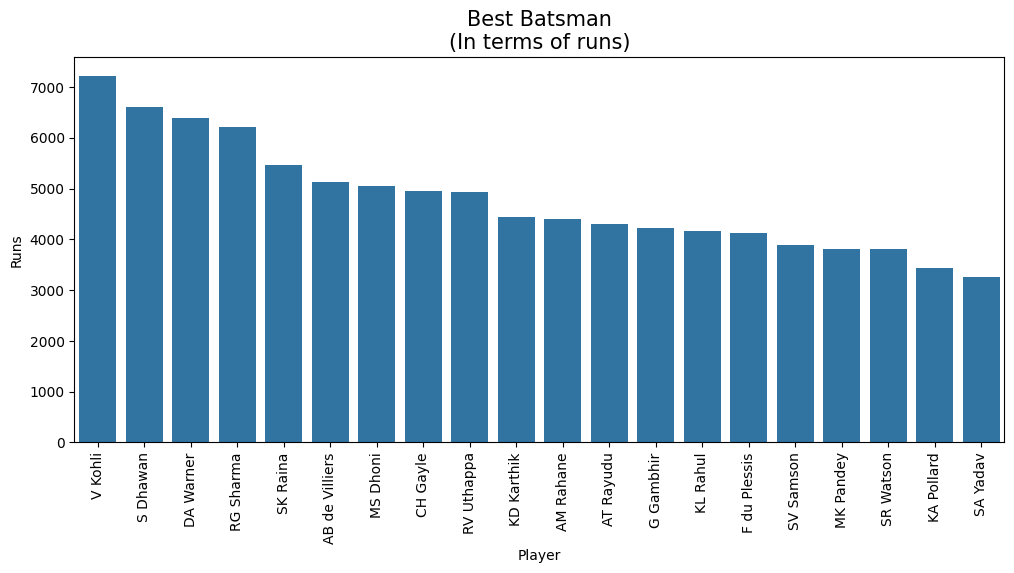

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(x=df11.index, y=df11['batsman_runs'])
plt.xticks(rotation='vertical')
plt.title('Best Batsman\n(In terms of runs)',size=15)
plt.xlabel("Player",size=10)
plt.ylabel("Runs", size=10)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

# Most Destructive batsman

In [27]:
df12=df.groupby(['batter']).batsman_runs.sum().reset_index()

In [28]:
df12['balls']=df.groupby(['batter']).ball.count().reset_index()['ball']

In [29]:
df12['rate']=df12['batsman_runs']/df12['balls']*100

In [30]:
df12=df12[df12['batsman_runs']>1500].sort_values(by=['rate'],ascending=False).head(15)

In [31]:
df12

,batter,batsman_runs,balls,rate
36,AD Russell,2266,1374,164.919942
193,GJ Maxwell,2720,1796,151.447661
27,AB de Villiers,5127,3446,148.781196
597,V Sehwag,2633,1776,148.254505
230,JC Buttler,3224,2253,143.098091
464,RR Pant,2851,2000,142.550000
419,PP Shaw,1694,1196,141.638796
116,CH Gayle,4953,3499,141.554730
504,SA Yadav,3249,2313,140.466926
264,KA Pollard,3437,2447,140.457703


C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\87089166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df12['rate'], y=df12['batter'],palette='rocket')


Text(0.5, 0, 'Strike Rate')

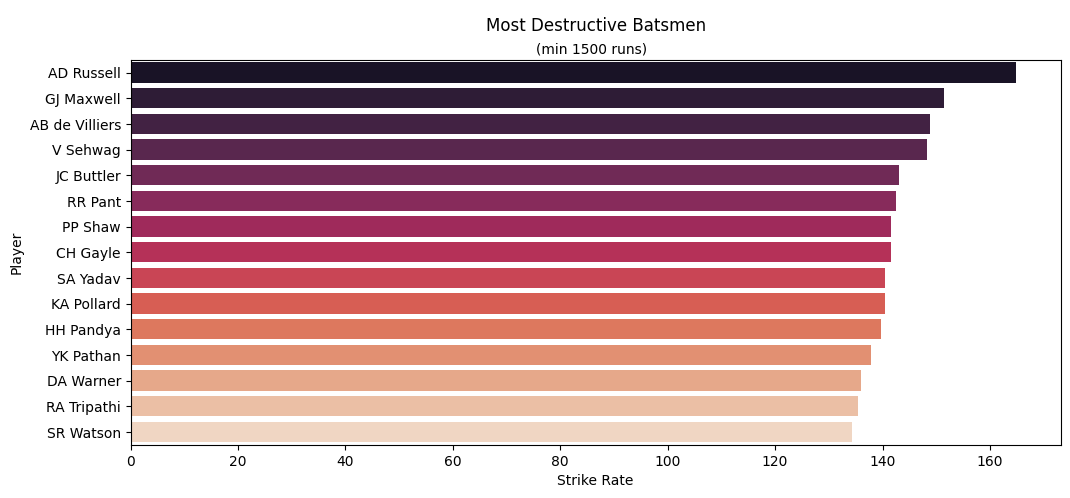

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x=df12['rate'], y=df12['batter'],palette='rocket')
plt.title("Most Destructive Batsmen\n",size=12)
plt.suptitle("\n\n     (min 1500 runs)",size=10)
plt.ylabel("Player")
plt.xlabel("Strike Rate")

# Best Bowler (Economy rate)

Economy rate is the average number of runs conceded for each over bowled.
A lower economy rate is seen as preferable – it means that the bowler is able to get more batsmen out with fewer balls. The statistic is considered to be more important in shorter games than longer test matches.

Formula – How to calculate economy rate
Economy Rate = Runs Conceded ÷ Overs Bowled

In [33]:
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [34]:
df13=df.groupby(['bowler']).sum()
df13

,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
bowler,,,,,,,,,,,,,,,,
A Ashish Reddy,170451945,442,DCDCDCDCDCDCDCDCDCDCDCDCRPSRPSRPSRPSRPSRPSRPSR...,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,3535,962,DA WarnerDA WarnerDA WarnerDA WarnerDA WarnerD...,NV OjhaNV OjhaNV OjhaNV OjhaNV OjhaNV OjhaDA W...,386,14,400,widesnoballsnoballswideswidesbyeswideswidesleg...,19,RV UthappaMN SamuelsJEC FranklinRV UthappaRA J...,bowledcaughtcaughtcaughtcaughtlbwlbwbowledcaug...,KC SangakkaraPA PatelDJ HarrisKC SangakkaraMS ...
A Badoni,17008664,20,MIMIMIMIMIMIRRRRRRRRRRRRPK,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSG,134,52,Tilak VarmaSA YadavKA PollardTilak VarmaKA Pol...,SA YadavTilak VarmaTilak VarmaKA PollardTilak ...,11,1,12,legbyes,2,SA YadavYBK Jaiswal,caughtcaught and bowled,KL Rahul
A Chandila,135767052,348,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,1080,819,V KohliV KohliTM DilshanTM DilshanV KohliV Koh...,TM DilshanTM DilshanV KohliV KohliTM DilshanTM...,242,3,245,legbyeslegbyes,11,JD RyderSC GangulyRV UthappaAP MajumdarCL Whit...,caughtstumpedstumpedcaught and bowledcaught an...,SR WatsonSP GoswamiSP GoswamiSK TrivediSR Wats...
A Choudhary,116922946,164,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,894,402,S DhawanDA WarnerDA WarnerDA WarnerDA WarnerMC...,DA WarnerS DhawanS DhawanS DhawanS DhawanS Dha...,137,7,144,noballswideswideswideswideswideswides,5,DA WarnerPA PatelHM AmlaMM SharmaSP Narine,caughtcaughtcaughtcaughtcaught,Mandeep SinghYS ChahalKM JadhavKM JadhavKM Jadhav
A Dananjaya,28414225,50,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,200,91,JJ RoyJJ RoyJJ RoyJJ RoyJJ RoyG GambhirRR Pant...,G GambhirG GambhirG GambhirG GambhirG GambhirJ...,46,1,47,wides,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,387340703,433,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,GTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGT...,2668,1091,JC ButtlerJC ButtlerJC ButtlerJC ButtlerJC But...,D PadikkalD PadikkalD PadikkalD PadikkalD Padi...,444,17,461,widesnoballswidesnoballswideswideswideswideswi...,15,D PadikkalHE van der DussenYS ChahalRD Gaikwad...,caughtcaughtcaughtcaughtcaughtcaughtcaughtcaug...,Shubman GillMS WadeV ShankarA ManoharWP SahaWP...
Yash Thakur,281701749,282,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGL...,2627,784,DP ConwayRD GaikwadDP ConwayRD GaikwadRD Gaikw...,RD GaikwadDP ConwayRD GaikwadDP ConwayDP Conwa...,273,24,297,noballslegbyeslegbyeslegbyeswideswideswideswid...,15,RA TripathiSikandar RazaJM SharmaRD ChaharM Sh...,caughtcaughtcaughtcaughtcaughtrun outcaughtbow...,A MishraKH PandyaKL RahulDJ HoodaRavi BishnoiY...
Yudhvir Singh,67975518,81,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKRRRRRRRRRR...,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGL...,121,182,Atharva TaideAtharva TaideAtharva TaideMW Shor...,P Simran SinghP Simran SinghP Simran SinghP Si...,64,9,73,legbyeswideswideslegbyes,3,Atharva TaideP Simran SinghAbhishek Sharma,caughtbowledcaught,Avesh KhanQ de Kock


In [35]:
df13['over']=df['bowler'].value_counts()/6
df13

,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
bowler,,,,,,,,,,,,,,,,
A Ashish Reddy,170451945,442,DCDCDCDCDCDCDCDCDCDCDCDCRPSRPSRPSRPSRPSRPSRPSR...,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,45.000000,962,DA WarnerDA WarnerDA WarnerDA WarnerDA WarnerD...,NV OjhaNV OjhaNV OjhaNV OjhaNV OjhaNV OjhaDA W...,386,14,400,widesnoballsnoballswideswidesbyeswideswidesleg...,19,RV UthappaMN SamuelsJEC FranklinRV UthappaRA J...,bowledcaughtcaughtcaughtcaughtlbwlbwbowledcaug...,KC SangakkaraPA PatelDJ HarrisKC SangakkaraMS ...
A Badoni,17008664,20,MIMIMIMIMIMIRRRRRRRRRRRRPK,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSG,2.166667,52,Tilak VarmaSA YadavKA PollardTilak VarmaKA Pol...,SA YadavTilak VarmaTilak VarmaKA PollardTilak ...,11,1,12,legbyes,2,SA YadavYBK Jaiswal,caughtcaught and bowled,KL Rahul
A Chandila,135767052,348,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,39.000000,819,V KohliV KohliTM DilshanTM DilshanV KohliV Koh...,TM DilshanTM DilshanV KohliV KohliTM DilshanTM...,242,3,245,legbyeslegbyes,11,JD RyderSC GangulyRV UthappaAP MajumdarCL Whit...,caughtstumpedstumpedcaught and bowledcaught an...,SR WatsonSP GoswamiSP GoswamiSK TrivediSR Wats...
A Choudhary,116922946,164,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,18.000000,402,S DhawanDA WarnerDA WarnerDA WarnerDA WarnerMC...,DA WarnerS DhawanS DhawanS DhawanS DhawanS Dha...,137,7,144,noballswideswideswideswideswideswides,5,DA WarnerPA PatelHM AmlaMM SharmaSP Narine,caughtcaughtcaughtcaughtcaught,Mandeep SinghYS ChahalKM JadhavKM JadhavKM Jadhav
A Dananjaya,28414225,50,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,4.166667,91,JJ RoyJJ RoyJJ RoyJJ RoyJJ RoyG GambhirRR Pant...,G GambhirG GambhirG GambhirG GambhirG GambhirJ...,46,1,47,wides,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,387340703,433,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,GTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGT...,48.833333,1091,JC ButtlerJC ButtlerJC ButtlerJC ButtlerJC But...,D PadikkalD PadikkalD PadikkalD PadikkalD Padi...,444,17,461,widesnoballswidesnoballswideswideswideswideswi...,15,D PadikkalHE van der DussenYS ChahalRD Gaikwad...,caughtcaughtcaughtcaughtcaughtcaughtcaughtcaug...,Shubman GillMS WadeV ShankarA ManoharWP SahaWP...
Yash Thakur,281701749,282,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGL...,34.500000,784,DP ConwayRD GaikwadDP ConwayRD GaikwadRD Gaikw...,RD GaikwadDP ConwayRD GaikwadDP ConwayDP Conwa...,273,24,297,noballslegbyeslegbyeslegbyeswideswideswideswid...,15,RA TripathiSikandar RazaJM SharmaRD ChaharM Sh...,caughtcaughtcaughtcaughtcaughtrun outcaughtbow...,A MishraKH PandyaKL RahulDJ HoodaRavi BishnoiY...
Yudhvir Singh,67975518,81,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKRRRRRRRRRR...,LSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGL...,8.333333,182,Atharva TaideAtharva TaideAtharva TaideMW Shor...,P Simran SinghP Simran SinghP Simran SinghP Si...,64,9,73,legbyeswideswideslegbyes,3,Atharva TaideP Simran SinghAbhishek Sharma,caughtbowledcaught,Avesh KhanQ de Kock


In [36]:
df13=df13[df13['over']>=150]
df13

,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
bowler,,,,,,,,,,,,,,,,
A Kumble,382755611,1376,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,163.833333,3488,SR WatsonSR WatsonSR WatsonSR WatsonSR WatsonG...,GC SmithGC SmithGC SmithGC SmithGC SmithSR Wat...,1027,62,1089,wideswideslegbyeslegbyeswideswideslegbyeslegby...,49,HH GibbsDJ HusseySA AsnodkarTM DilshanKD Karth...,stumpedrun outcaughtstumpedcaughtcaught and bo...,SP GoswamiDW SteynMisbah-ul-HaqSP GoswamiCL Wh...
A Mishra,2604855012,5205,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRKKRKKR...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,568.000000,12179,GC SmithGC SmithGC SmithGC SmithRA JadejaRA Ja...,SR WatsonSR WatsonSR WatsonSR WatsonSR WatsonS...,4033,126,4159,noballswideswideslegbyeswideslegbyeswideswides...,181,GC SmithRA JadejaShahid AfridiHH GibbsDB Ravi ...,caughtbowledcaughtbowledcaughtcaughtstumpedcau...,VY MaheshAB de VilliersShoaib MalikTM DilshanK...
A Nehra,1237783039,2942,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,329.000000,7137,S ChanderpaulS ChanderpaulR DravidR DravidS Ch...,R DravidR DravidS ChanderpaulS ChanderpaulR Dr...,2422,115,2537,wideswideswideswidesnoballslegbyeswideslegbyes...,121,V KohliPA PatelML HaydenIK PathanRR SarwanG Ga...,caughtcaughtrun outcaughtcaughtcaughtcaughtcau...,L RonchiL RonchiHarbhajan SinghDS KulkarniHarb...
A Nortje,1220973577,1516,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,159.500000,3458,KL RahulKL RahulKL RahulMA AgarwalMA AgarwalMA...,MA AgarwalMA AgarwalMA AgarwalKL RahulKL Rahul...,1237,79,1316,legbyeslegbyeswideswidesbyesbyeslegbyeswidesle...,55,Shubman GillRA TripathiSPD SmithD PadikkalCH M...,caughtbowledcaughtbowledcaughtrun outcaughtbow...,AR PatelSO HetmyerRR PantSS IyerAT CareyHV Pat...
AB Dinda,950121142,2273,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,KKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRK...,264.833333,5814,R DravidW JafferW JafferW JafferR DravidW Jaff...,W JafferR DravidR DravidR DravidW JafferR Drav...,1987,116,2103,wideswidesnoballswideswideslegbyeswideswidesle...,82,V KohliW JafferVVS LaxmanMK PandeyJR HopesHH G...,bowledcaughtcaughtbowledcaughtcaughtcaughtcaug...,RT PontingLR ShuklaBJ HodgeSalman ButtSC Gangu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VR Aaron,899504827,1423,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,177.500000,3969,SE MarshSE MarshSE MarshAC GilchristAC Gilchri...,AC GilchristAC GilchristAC GilchristSE MarshSE...,1401,126,1527,legbyeswideswideswideswideswideswideslegbyesle...,46,AC GilchristSK RainaKC SangakkaraCL WhiteG Gam...,bowledcaughtcaughtcaughtbowledcaughtcaughtcaug...,IK PathanS NadeemNV OjhaNV OjhaV SehwagIK Path...
Washington Sundar,1255692681,1536,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,RPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSR...,172.333333,3651,DA WarnerDA WarnerS DhawanS DhawanS DhawanDA W...,S DhawanS DhawanDA WarnerDA WarnerDA WarnerS D...,1236,26,1262,legbyeswideswideslegbyeslegbyeslegbyeswidesleg...,38,PA PatelSP NarineSachin BabySP JacksonG Gambhi...,bowledrun outcaughthit wicketcaughtstumpedlbwc...,SN ThakurSPD SmithAM RahaneMS DhoniSPD SmithSP...
YK Pathan,578912637,1638,DCDCDCDCDCDCDCDCDCDCDCDCDCDCPKPKPKPKPKPKSRHSRH...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,190.166667,4119,G GambhirG GambhirG GambhirG GambhirS DhawanG ...,S DhawanS DhawanS DhawanS DhawanG GambhirS Dha...,1337,69,1406,wideslegbyeslegbyeslegbyeswideswideswideswides...,42,AC GilchristShahid AfridiLR ShuklaSB StyrisJR ...,stumpedcaughtrun outcaughtcaughtbowledrun outc...,Kamran AkmalRA JadejaRA JadejaSK WarneD Salunk...


In [37]:
df13['rate']=df13['total_runs']/df13['over']
df13

C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\3192818200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['rate']=df13['total_runs']/df13['over']


,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,rate
bowler,,,,,,,,,,,,,,,,,
A Kumble,382755611,1376,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,163.833333,3488,SR WatsonSR WatsonSR WatsonSR WatsonSR WatsonG...,GC SmithGC SmithGC SmithGC SmithGC SmithSR Wat...,1027,62,1089,wideswideslegbyeslegbyeswideswideslegbyeslegby...,49,HH GibbsDJ HusseySA AsnodkarTM DilshanKD Karth...,stumpedrun outcaughtstumpedcaughtcaught and bo...,SP GoswamiDW SteynMisbah-ul-HaqSP GoswamiCL Wh...,6.646999
A Mishra,2604855012,5205,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRKKRKKR...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,568.000000,12179,GC SmithGC SmithGC SmithGC SmithRA JadejaRA Ja...,SR WatsonSR WatsonSR WatsonSR WatsonSR WatsonS...,4033,126,4159,noballswideswideslegbyeswideslegbyeswideswides...,181,GC SmithRA JadejaShahid AfridiHH GibbsDB Ravi ...,caughtbowledcaughtbowledcaughtcaughtstumpedcau...,VY MaheshAB de VilliersShoaib MalikTM DilshanK...,7.322183
A Nehra,1237783039,2942,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,329.000000,7137,S ChanderpaulS ChanderpaulR DravidR DravidS Ch...,R DravidR DravidS ChanderpaulS ChanderpaulR Dr...,2422,115,2537,wideswideswideswidesnoballslegbyeswideslegbyes...,121,V KohliPA PatelML HaydenIK PathanRR SarwanG Ga...,caughtcaughtrun outcaughtcaughtcaughtcaughtcau...,L RonchiL RonchiHarbhajan SinghDS KulkarniHarb...,7.711246
A Nortje,1220973577,1516,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,159.500000,3458,KL RahulKL RahulKL RahulMA AgarwalMA AgarwalMA...,MA AgarwalMA AgarwalMA AgarwalKL RahulKL Rahul...,1237,79,1316,legbyeslegbyeswideswidesbyesbyeslegbyeswidesle...,55,Shubman GillRA TripathiSPD SmithD PadikkalCH M...,caughtbowledcaughtbowledcaughtrun outcaughtbow...,AR PatelSO HetmyerRR PantSS IyerAT CareyHV Pat...,8.250784
AB Dinda,950121142,2273,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,KKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRK...,264.833333,5814,R DravidW JafferW JafferW JafferR DravidW Jaff...,W JafferR DravidR DravidR DravidW JafferR Drav...,1987,116,2103,wideswidesnoballswideswideslegbyeswideswidesle...,82,V KohliW JafferVVS LaxmanMK PandeyJR HopesHH G...,bowledcaughtcaughtbowledcaughtcaughtcaughtcaug...,RT PontingLR ShuklaBJ HodgeSalman ButtSC Gangu...,7.940843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VR Aaron,899504827,1423,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,DCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDC...,177.500000,3969,SE MarshSE MarshSE MarshAC GilchristAC Gilchri...,AC GilchristAC GilchristAC GilchristSE MarshSE...,1401,126,1527,legbyeswideswideswideswideswideswideslegbyesle...,46,AC GilchristSK RainaKC SangakkaraCL WhiteG Gam...,bowledcaughtcaughtcaughtbowledcaughtcaughtcaug...,IK PathanS NadeemNV OjhaNV OjhaV SehwagIK Path...,8.602817
Washington Sundar,1255692681,1536,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,RPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSR...,172.333333,3651,DA WarnerDA WarnerS DhawanS DhawanS DhawanDA W...,S DhawanS DhawanDA WarnerDA WarnerDA WarnerS D...,1236,26,1262,legbyeswideswideslegbyeslegbyeslegbyeswidesleg...,38,PA PatelSP NarineSachin BabySP JacksonG Gambhi...,bowledrun outcaughthit wicketcaughtstumpedlbwc...,SN ThakurSPD SmithAM RahaneMS DhoniSPD SmithSP...,7.323017
YK Pathan,578912637,1638,DCDCDCDCDCDCDCDCDCDCDCDCDCDCPKPKPKPKPKPKSRHSRH...,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,190.166667,4119,G GambhirG GambhirG GambhirG GambhirS DhawanG ...,S DhawanS DhawanS DhawanS DhawanG GambhirS Dha...,1337,69,1406,wideslegbyeslegbyeslegbyeswideswideswideswides...,42,AC GilchristShahid AfridiLR ShuklaSB StyrisJR ...,stumpedcaughtrun outcaughtcaughtbowledrun outc...,Kamran AkmalRA JadejaRA JadejaSK WarneD Salunk...

In [38]:
df13=df13.sort_values(by=['rate'],ascending=True).head(15)
df13

,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,rate
bowler,,,,,,,,,,,,,,,,,
M Muralitharan,662753535,2290,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,244.000000,5305,KC SangakkaraJR HopesKC SangakkaraJR HopesKC S...,JR HopesKC SangakkaraJR HopesKC SangakkaraJR H...,1505,115,1620,legbyeswidesbyeswideswideswideswideswideswides...,65,KC SangakkaraMA KhoteHarbhajan SinghYK PathanR...,caughtcaughtcaughtcaughtcaughtcaughtcaughtbowl...,Joginder SharmaSK RainaS BadrinathSK RainaS Ba...,6.639344
A Kumble,382755611,1376,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,163.833333,3488,SR WatsonSR WatsonSR WatsonSR WatsonSR WatsonG...,GC SmithGC SmithGC SmithGC SmithGC SmithSR Wat...,1027,62,1089,wideswideslegbyeslegbyeswideswideslegbyeslegby...,49,HH GibbsDJ HusseySA AsnodkarTM DilshanKD Karth...,stumpedrun outcaughtstumpedcaughtcaught and bo...,SP GoswamiDW SteynMisbah-ul-HaqSP GoswamiCL Wh...,6.646999
Rashid Khan,3226646761,3923,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,439.833333,9328,Mandeep SinghMandeep SinghMandeep SinghMandeep...,CH GayleCH GayleCH GayleCH GayleCH GayleCH Gay...,2855,113,2968,legbyeslegbyeswideslegbyesbyeslegbyeslegbyeswi...,147,Mandeep SinghTM HeadBB McCullumAJ FinchSK Rain...,bowledcaughtlbwlbwlbwlbwbowledbowledbowledbowl...,Yuvraj SinghRashid KhanDJ HoodaS KaulMC Henriq...,6.748011
SP Narine,3828724436,5365,RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,KKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRK...,635.333333,13545,R DravidR DravidR DravidR DravidR DravidR Drav...,SP GoswamiSP GoswamiSP GoswamiSP GoswamiSP Gos...,4129,167,4296,legbyeswideslegbyesbyeslegbyeswideslegbyeslegb...,182,OA ShahAC GilchristSE MarshBipul SharmaP Kumar...,stumpedcaughtbowledcaughtbowledcaughtcaughtbow...,MS BislaMK TiwaryMS BislaMS BislaJH KallisBB M...,6.761805
DW Steyn,1317967624,3538,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,376.500000,8254,PA PatelML HaydenML HaydenML HaydenML HaydenML...,ML HaydenPA PatelPA PatelPA PatelPA PatelPA Pa...,2392,175,2567,wideswideswideswidesnoballswideslegbyeslegbyes...,102,V SehwagShoaib MalikWPUJC VaasAS YadavRP Singh...,run outbowledrun outcaughtbowledlbwcaughtbowle...,LRPL TaylorSP GoswamiB ChipliMV BoucherB Akhil...,6.818061
R Ashwin,3940712643,6704,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,714.166667,15500,LA PomersbachLA PomersbachLA PomersbachSM Kati...,SM KatichSM KatichSM KatichLA PomersbachLA Pom...,4692,226,4918,legbyeswideswidesbyeswideslegbyeslegbyeslegbye...,186,KC SangakkaraWA MotaAC GilchristVVS LaxmanSE B...,caught and bowledlbwbowledrun outbowledcaughtc...,SK RainaSK RainaM VijayMS DhoniMS DhoniMS Dhon...,6.886348
SL Malinga,2008186708,4466,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,491.166667,10787,PA PatelPA PatelSK RainaSK RainaSK RainaSK Rai...,ML HaydenML HaydenML HaydenML HaydenML HaydenM...,3155,288,3443,legbyeslegbyeswideswideswidesbyeslegbyesnoball...,186,PA PatelS BadrinathMS DhoniY Venugopal RaoFH E...,caughtcaughtbowledbowledbowledlbwcaughtbowledb...,SR TendulkarDJ BravoJP DuminyJP DuminyDJ Bravo...,7.009841
Harbhajan Singh,2549416820,5215,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...,578.666667,12436,LRPL TaylorLRPL TaylorLRPL TaylorLRPL TaylorLR...,R DravidR DravidR DravidR DravidR DravidLRPL T...,3895,173,4068,wideslegbyeslegbyeswideslegbyeswideslegbyesleg...,161,R DravidJH KallisK GoelDPMD JayawardeneKC Sang...,caught and bowledcaughtrun outcaughtcaughtlbwc...,AM NayarDJ BravoAM RahaneDS KulkarniST Jayasur...,7.029954
R Sharma,489032524,1376,DCDCDCDCDCDCDCDC

In [39]:
df13.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,rate
bowler,,,,,,,,,,,,,,,,,
Rashid Khan,3226646761,3923,RCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBR...,SRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHSRHS...,439.833333,9328,Mandeep SinghMandeep SinghMandeep SinghMandeep...,CH GayleCH GayleCH GayleCH GayleCH GayleCH Gay...,2855,113,2968,legbyeslegbyeswideslegbyesbyeslegbyeslegbyeswi...,147,Mandeep SinghTM HeadBB McCullumAJ FinchSK Rain...,bowledcaughtlbwlbwlbwlbwbowledbowledbowledbowl...,Yuvraj SinghRashid KhanDJ HoodaS KaulMC Henriq...,6.748011
AR Patel,3148462882,4262,CSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKCSKC...,PKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPKPK...,481.166667,10263,DR SmithBB McCullumBB McCullumBB McCullumBB Mc...,BB McCullumDR SmithDR SmithDR SmithDR SmithDR ...,3371,113,3484,wideswideswideslegbyeslegbyeslegbyeslegbyesleg...,120,BB McCullumSR WatsonIK PathanKL RahulCA LynnPP...,caughtbowledbowledcaughtbowledstumpedbowledbow...,GJ MaxwellDA MillerWP SahaKaranveer SinghWP Sa...,7.240734


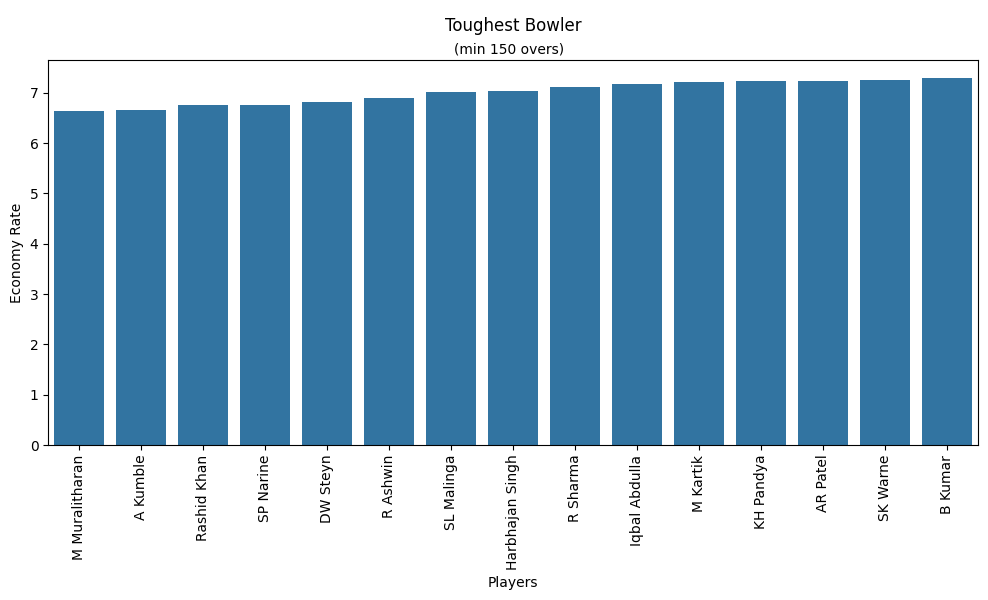

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(x=df13.index,y=df13['rate'])
plt.xticks(rotation='vertical')
plt.title("Toughest Bowler\n",size=12)
plt.suptitle("\n\n     (min 150 overs)",size=10)
plt.ylabel("Economy Rate")
plt.xlabel("Players")
plt.show()

# Best Bowler (in term of wicket)

In [41]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [42]:
df14=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']

In [43]:
df14=df.loc[df['dismissal_kind'].isin(df14)]
df14.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,KKR,RCB,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
74,335982,1,KKR,RCB,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar
106,335982,1,KKR,RCB,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,1,DJ Hussey,caught,CL White
131,335982,2,RCB,KKR,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN
138,335982,2,RCB,KKR,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN


In [44]:
df14=df14['bowler'].value_counts().reset_index().head(15)
df14.columns=['bowler','wickets']
df14

,bowler,wickets
0,YS Chahal,187
1,DJ Bravo,182
2,PP Chawla,178
3,A Mishra,172
4,B Kumar,170
5,R Ashwin,168
6,SL Malinga,168
7,SP Narine,163
8,Harbhajan Singh,150
9,JJ Bumrah,148


C:\Users\vivek\AppData\Local\Temp\ipykernel_2488\3270152669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df14['wickets'],y=df14['bowler'],palette='rocket')


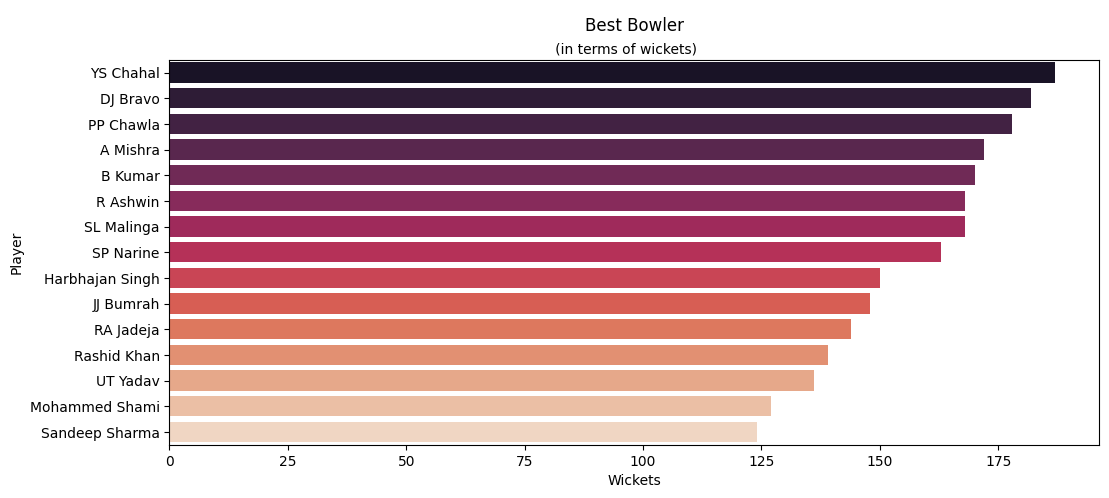

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(x=df14['wickets'],y=df14['bowler'],palette='rocket')
plt.title("Best Bowler\n",size=12)
plt.suptitle("\n\n   (in terms of wickets)",size=10)
plt.xlabel("Wickets",size=10)
plt.ylabel("Player",size=10)
plt.show()

# match Dataset

In [46]:
df1=pd.read_csv("E:\Ducat\project\kaggle\matches.csv")
df1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [47]:
df1.tail(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,wickets,6.0,198.0,20.0,N,NaN,Nitin Menon,VK Sharma
1020,1370350,2023,Chennai,2023-05-23,Qualifier 1,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Chennai Super Kings,runs,15.0,173.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney
1021,1370351,2023,Chennai,2023-05-24,Eliminator,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,Mumbai Indians,runs,81.0,183.0,20.0,N,NaN,BNJ Oxenford,VK Sharma
1022,1370352,2023,Ahmedabad,2023-05-26,Qualifier 2,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Gujarat Titans,runs,62.0,234.0,20.0,N,NaN,Nitin Menon,RJ Tucker
1023,1370353,2023,Ahmedabad,2023-05-29,Final,DP Conway,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,171.0,15.0,N,D/L,Nitin Menon,RJ Tucker


In [47]:
df1['team1'].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            120
Mumbai Indians                 118
Kolkata Knight Riders          112
Rajasthan Royals                96
Kings XI Punjab                 92
Delhi Daredevils                85
Sunrisers Hyderabad             76
Deccan Chargers                 39
Delhi Capitals                  34
Punjab Kings                    27
Pune Warriors                   23
Gujarat Lions                   16
Lucknow Super Giants            15
Gujarat Titans                  15
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [48]:
df1=df1[df1["team1"]!="Kochi Tuskers Kerala"]
df1=df1[df1["team2"]!="Kochi Tuskers Kerala"]
df1=df1[df1["toss_winner"]!="Kochi Tuskers Kerala"]
df1=df1[df1["winner"]!="Kochi Tuskers Kerala"]

In [49]:
def team_name_change(data):
    if data=="Delhi Daredevils":
        data="Delhi Capitals"
    elif data=="Deccan Chargers":
        data="Sunrisers Hyderabad"
    elif data=="Pune Warriors" or data=="Rising Pune Supergiant":
        data="Rising Pune Supergiants"
    elif data=="Gujarat Lions":
        data="Gujarat Titans"
    elif data=="Kings XI Punjab":
        data="Punjab Kings"
    return data

In [50]:
df1["team1"]=df1["team1"].apply(lambda x:team_name_change(x))
df1["team2"]=df1["team2"].apply(lambda x:team_name_change(x))
df1["toss_winner"]=df1["toss_winner"].apply(lambda x:team_name_change(x))
df1["winner"]=df1["winner"].apply(lambda x:team_name_change(x))

In [51]:
df1.team1.unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [52]:
df1.replace(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals','Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals','Sunrisers Hyderabad', 'Chennai Super Kings','Rising Pune Supergiants', 'Gujarat Titans','Lucknow Super Giants'],['RCB','PK','DC','MI','KKR','RR','SRH','CSK','RPS','GT','LSG'],inplace=True)

In [53]:
df1.team1.unique()

array(['RCB', 'PK', 'DC', 'MI', 'KKR', 'RR', 'SRH', 'CSK', 'RPS', 'GT',
       'LSG'], dtype=object)

In [54]:
df1.isnull().sum()

id                   0
season               0
city                51
date                 0
match_type           0
player_of_match      5
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               5
result               0
result_margin       19
target_runs          3
target_overs         3
super_over           0
method             990
umpire1              0
umpire2              0
dtype: int64

In [55]:
#match_type, umpire1, umpire2, result_margin, target_runs, target_overs, super_over, method
df1=df1.drop(columns=["match_type","umpire1","umpire2"], axis=1)

In [56]:
df1['city'].fillna("Not Known",inplace=True)
df1['winner'].fillna("Not Known",inplace=True)
df1['player_of_match'].fillna("Not Known",inplace=True)
df1['target_runs'].fillna(0,inplace=True)
df1['target_overs'].fillna(0,inplace=True)
df1['result_margin'].fillna(0,inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_10548\1088644594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['city'].fillna("Not Known",inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_10548\1088644594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [57]:
df1.isnull().sum()

id                   0
season               0
city                 0
date                 0
player_of_match      0
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
target_runs          0
target_overs         0
super_over           0
method             990
dtype: int64

# Percentage of matches won by toss winner

In [58]:
print(len(df1[df1["toss_winner"] == df1["winner"]])*100/len(df1))

50.99009900990099


50.99 % chance of winning by toss winner as per analysis with all IPL Seasons

# Number of matches played at each stadium

In [59]:
df21= pd.DataFrame(df1["venue"].value_counts()).sort_values(by = ["count"])
df21

,count
venue,
"Himachal Pradesh Cricket Association Stadium, Dharamsala",2
"Barsapara Cricket Stadium, Guwahati",2
OUTsurance Oval,2
Buffalo Park,3
De Beers Diamond Oval,3
"Vidarbha Cricket Association Stadium, Jamtha",3
Green Park,4
"Sawai Mansingh Stadium, Jaipur",5
"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh",5


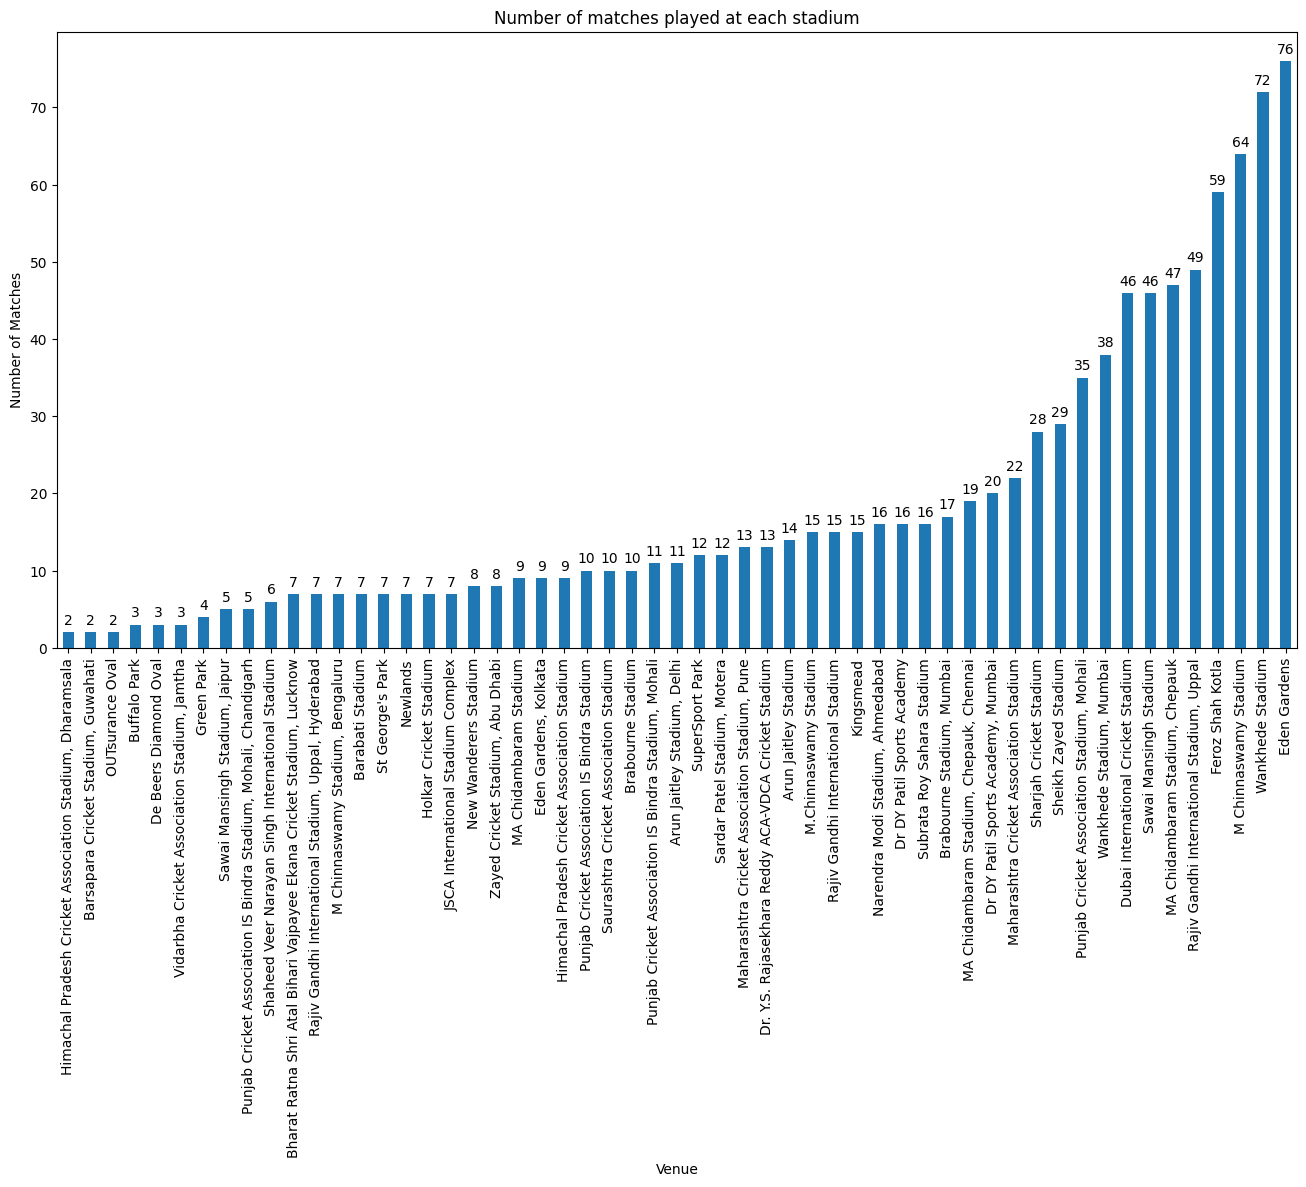

In [60]:
df21 = df21.plot.bar(figsize = (16,8))
df21.get_legend().set_visible(False)

for bar in df21.containers[0]:
    value = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, value + 1, f'{value:.0f}', ha ='center')

plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.title('Number of matches played at each stadium')
plt.show()


# Total wins picked by every team

In [61]:
df1.winner.value_counts()

winner
MI           140
CSK          130
KKR          120
RCB          114
DC           107
SRH          107
PK           106
RR           102
GT            36
RPS           26
LSG           17
Not Known      5
Name: count, dtype: int64

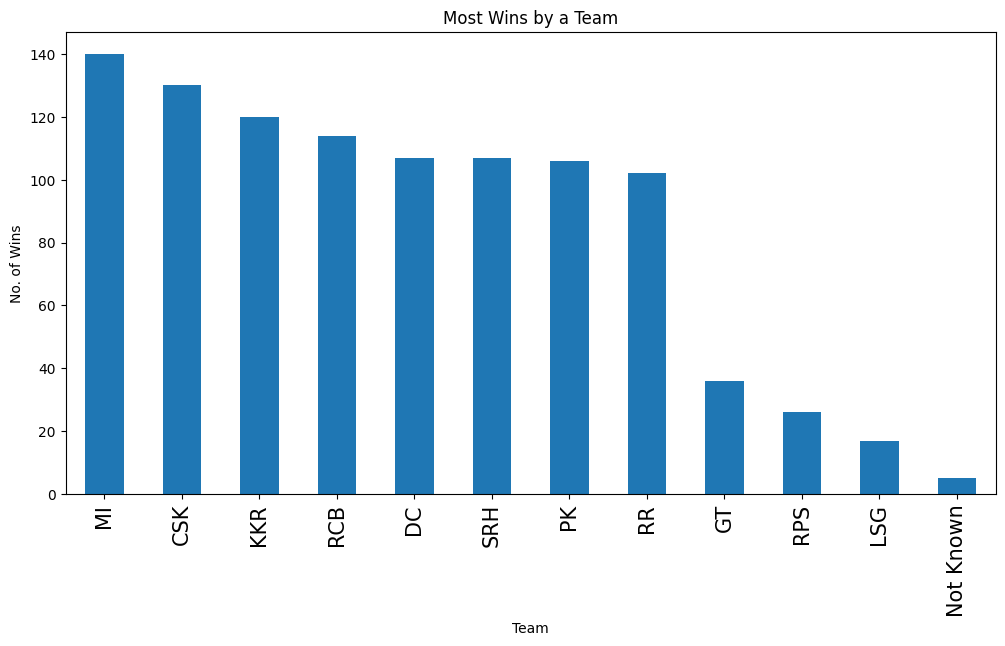

In [62]:
df1['winner'].value_counts().plot.bar(figsize=(12, 6))
plt.title("Most Wins by a Team",size=12)
plt.xlabel("Team",size=10)
plt.ylabel("No. of Wins",size=10)
plt.xticks(size=15)
plt.yticks(size=10)
plt.show()

We see MI has won most of the matches followed by CSK

# Top match winner

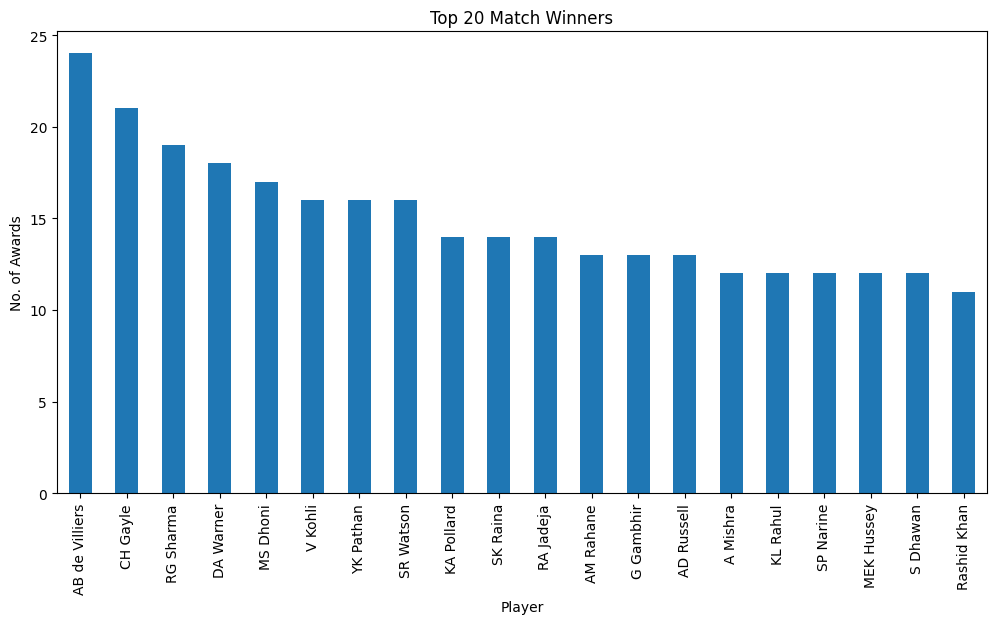

In [63]:
#df1=df1['player_of_match'].value_counts().head(10).reset_index()
df1['player_of_match'].value_counts().head(20).plot.bar(figsize=(12, 6))
plt.title("Top 20 Match Winners",size=12)
plt.ylabel("No. of Awards",size=10)
plt.xlabel("Player",size=10)
plt.show()

AB de Villers has got most of MOM award. Ch Gayle, Rohit Sharma, DA Warner also have most impact on game

# High Scoring Grounds

In [64]:
df1.head(2)

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,2007/08,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,NaN
1,335983,2007/08,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",PK,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,NaN


In [65]:
df22=df1[df1['target_runs']>150]
df22=df22['venue'].value_counts().head(20).reset_index()
df22.head()

,venue,count
0,Wankhede Stadium,54
1,Eden Gardens,50
2,M Chinnaswamy Stadium,48
3,Feroz Shah Kotla,42
4,Dubai International Cricket Stadium,34


C:\Users\vivek\AppData\Local\Temp\ipykernel_10548\380866883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df22['venue'],y=df22['count'],palette="dark:b")


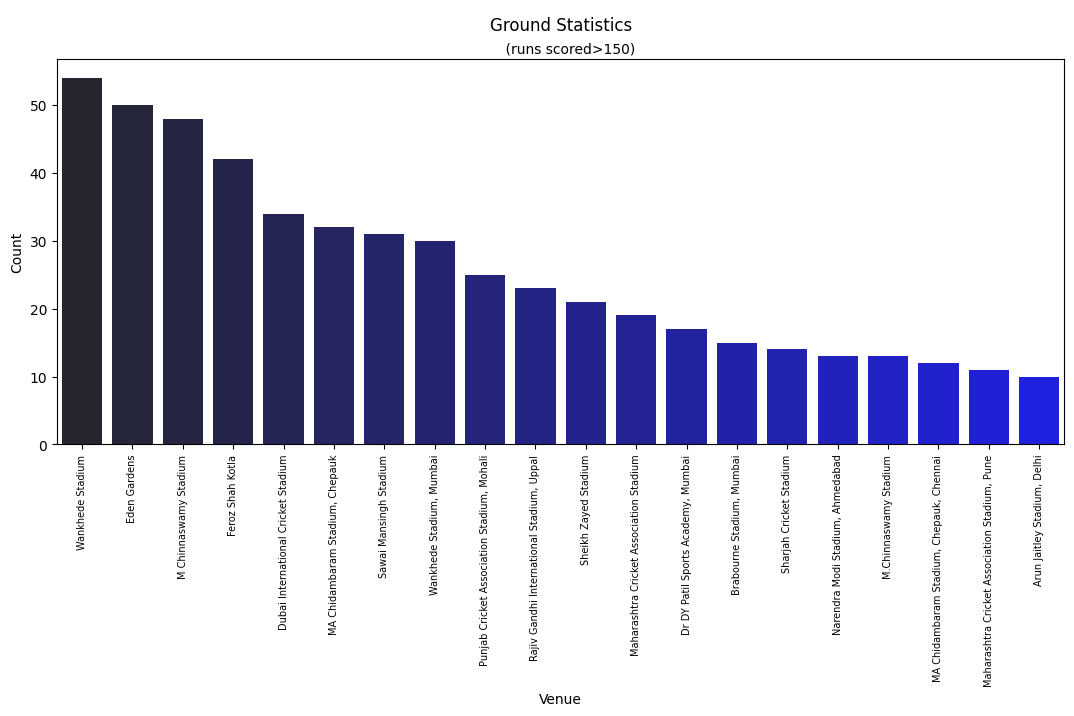

In [66]:
plt.figure(figsize=(13,5))
sns.barplot(x=df22['venue'],y=df22['count'],palette="dark:b")
plt.xticks(rotation='vertical',size=7)
plt.title("Ground Statistics\n",size=12)
plt.suptitle("\n\n            (runs scored>150)",size=10)
plt.ylabel("Count")
plt.xlabel("Venue")
plt.show()

# Team vs Venue Stats

In [67]:
df1.groupby(['venue','winner']).count()

id  season  city  date  \
venue                            winner                           
Arun Jaitley Stadium             CSK      1       1     1     1   
                                 DC       8       8     8     8   
                                 MI       1       1     1     1   
                                 PK       1       1     1     1   
                                 RCB      1       1     1     1   
...                                      ..     ...   ...   ...   
Zayed Cricket Stadium, Abu Dhabi DC       1       1     1     1   
                                 KKR      2       2     2     2   
                                 MI       2       2     2     2   
                                 RR       1       1     1     1   
                                 SRH      1       1     1     1   

                                         player_of_match  team1  team2  \
venue                            winner                                  
Arun Jaitley Stadium             CSK                   1      1      1   
                                 DC                    8      8      8   
                                 MI                    1      1      1   
                                 PK                    1      1      1   
                                 RCB                   1      1      1   
...                                                  ...    ...    ...   
Zayed Cricket Stadium, Abu Dhabi DC                    1      1      1   
                                 KKR                   2      2      2   
                                 MI                    2      2      2   
                                 RR                    1      1      1   
                                 SRH                   1      1      1   

                                         toss_winner  toss_decision  result  \
venue                            winner                                       
Arun Jaitley Stadium             CSK               1              1       1   
                                 DC                8              8       8   
                                 MI                1              1       1   
                                 PK                1              1       1   
                                 RCB               1              1       1   
...                                              ...            ...     ...   
Zayed Cricket Stadium, Abu Dhabi DC                1              1       1   
                                 KKR               2              2       2   
                                 MI                2              2       2   
                                 RR                1              1       1   
                                 SRH               1              1       1   

                                         result_margin  target_runs  \
venue                            winner                               
Arun Jaitley Stadium             CSK                 1            1   
                                 DC                  8            8   
                                 MI                  1            1   
                                 PK                  1            1   
                                 RCB                 1            1   
...                                                ...          ...   
Zayed Cricket Stadium, Abu Dhabi DC                  1            1   
                                 KKR                 2            2   
                                 MI                  2            2   
                                 RR                  1            1   
                                 SRH                 1            1   

                                         target_overs  super_over  method  
venue                            winner                                    
Arun Jaitley Stadium             CSK                1           1       0  
                          

In [68]:
v=df1['winner'].unique()
v

array(['KKR', 'CSK', 'DC', 'RCB', 'RR', 'PK', 'SRH', 'MI', 'RPS',
       'Not Known', 'GT', 'LSG'], dtype=object)

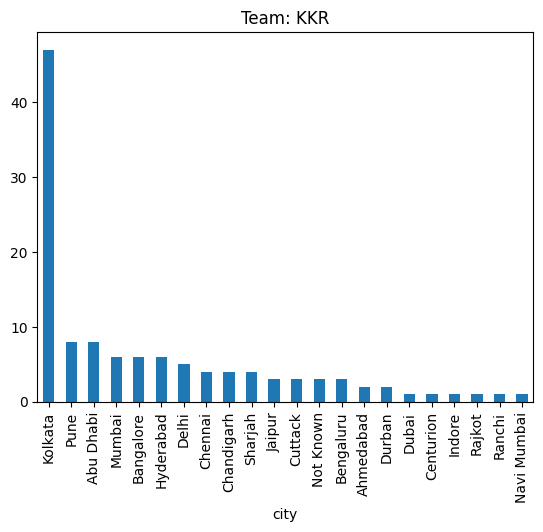

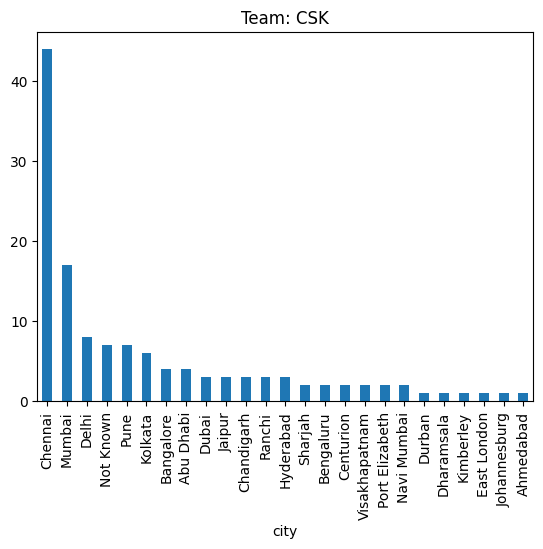

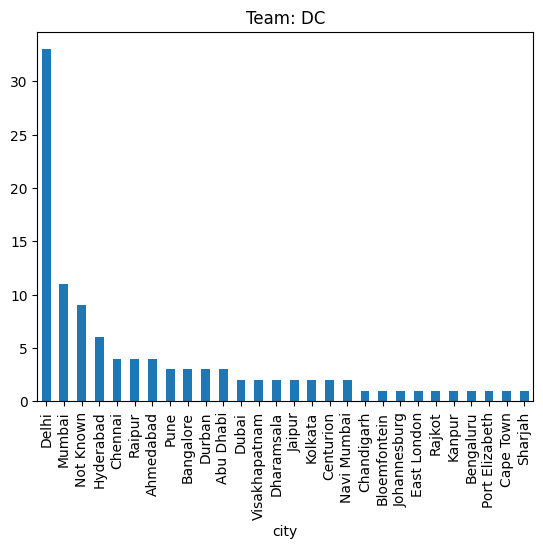

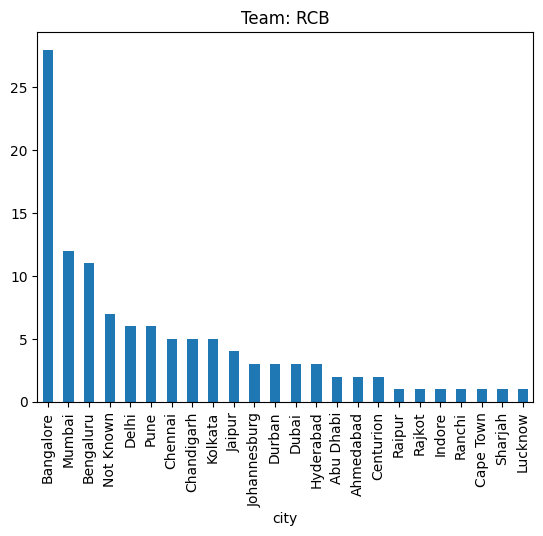

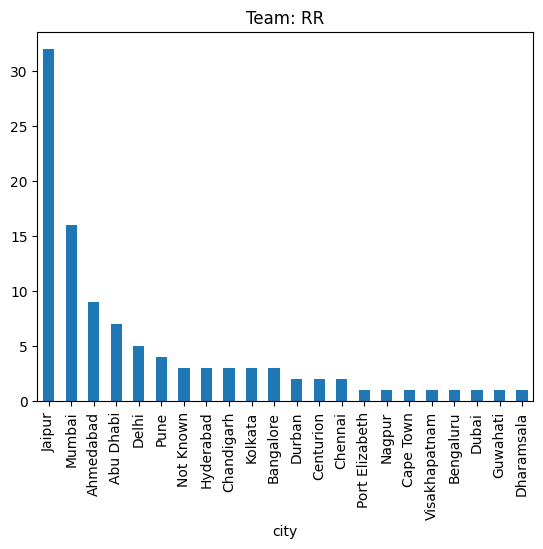

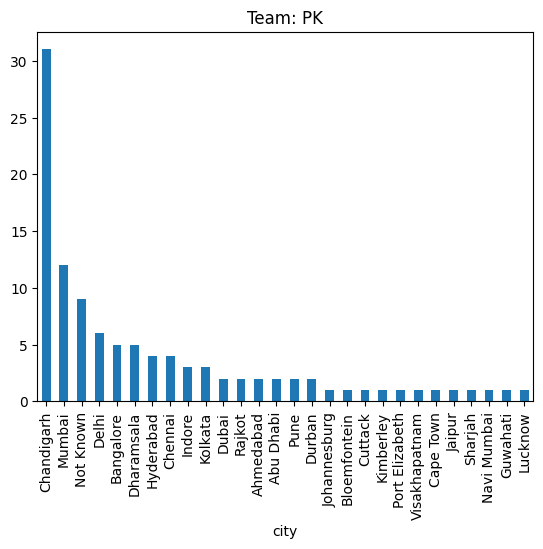

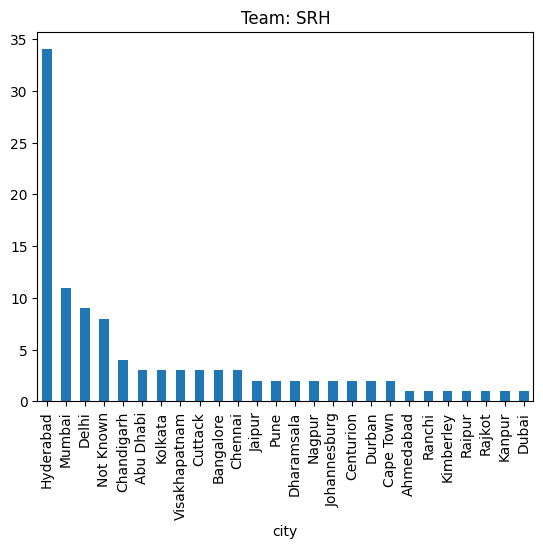

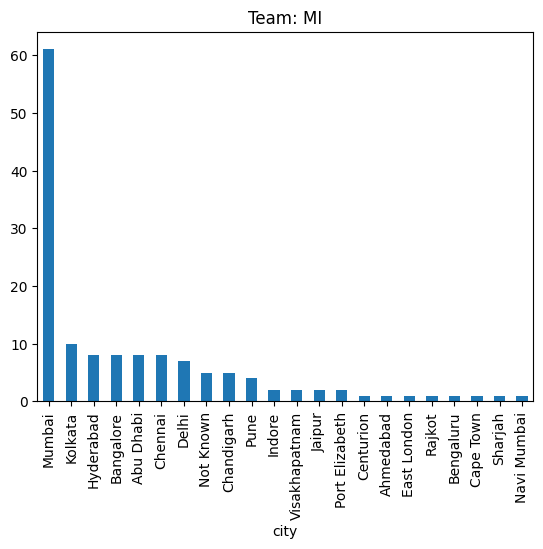

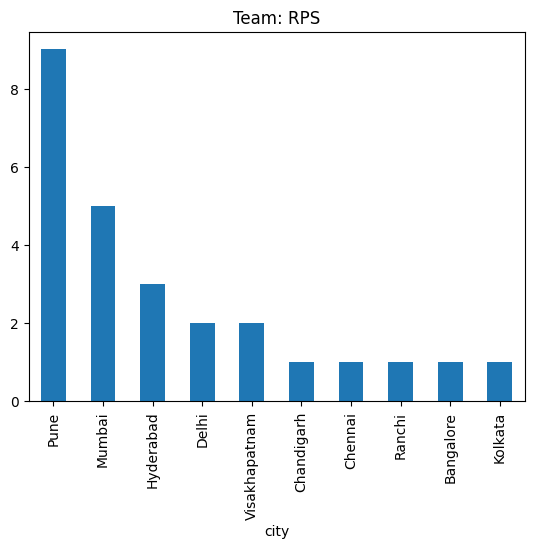

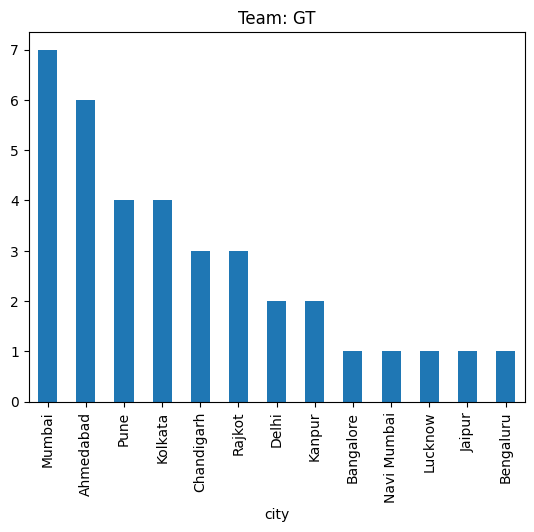

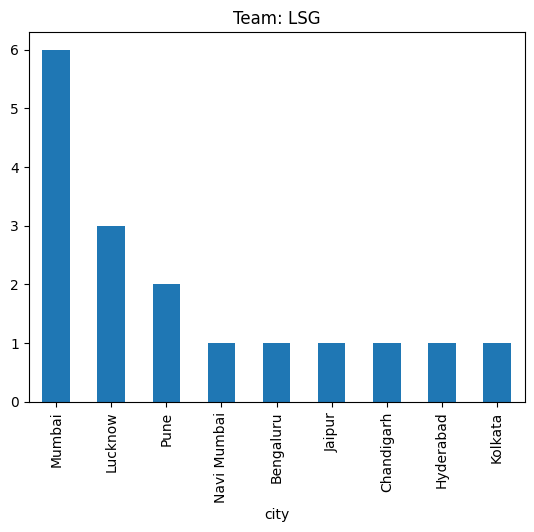

In [69]:
for i in range (0,len(v)):
    if(v[i]!="Not Known"):
        ven=df1[df1['winner']==v[i]]
        ven['city'].value_counts().plot.bar()
        plt.title("Team: "+v[i])
        plt.show()
        i+=1

# Number of super overs played in each season

In [70]:
x = pd.DataFrame(df1[df1["super_over"] == "Y"]["season"].value_counts()).reset_index()
x = x.sort_values(by = ["season"]).reset_index(drop = True)
x

,season,count
0,2009,1
1,2009/10,1
2,2013,2
3,2014,1
4,2015,1
5,2017,1
6,2019,2
7,2020/21,4
8,2021,1


# Merge df and df1

In [71]:
data_merged = pd.merge(df, df1[["id", "season"]], left_on = 'match_id', right_on = 'id')
data_merged

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240616,1370353,2,CSK,GT,14,2,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN,1370353,2023
240617,1370353,2,CSK,GT,14,3,RA Jadeja,MM Sharma,S Dube,1,0,1,NaN,0,NaN,NaN,NaN,1370353,2023
240618,1370353,2,CSK,GT,14,4,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN,1370353,2023
240619,1370353,2,CSK,GT,14,5,RA Jadeja,MM Sharma,S Dube,6,0,6,NaN,0,NaN,NaN,NaN,1370353,2023


# Total runs per season

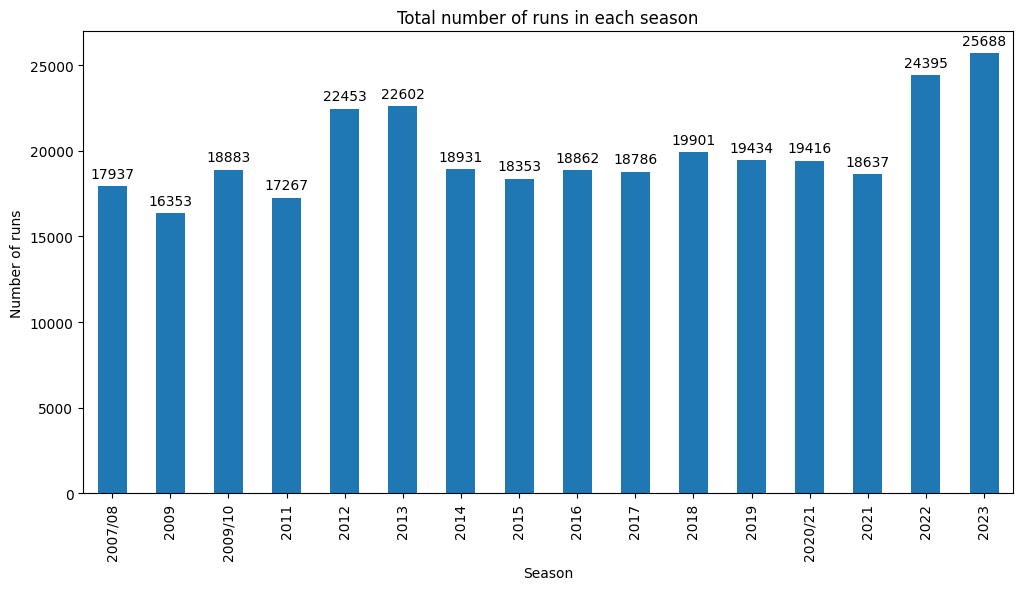

In [72]:
x = data_merged[["season", "total_runs"]].groupby(by = ["season"]).sum()
ax = x.plot.bar(figsize = (12,6))
ax.get_legend().set_visible(False)

for bar in ax.containers[0]:
    value = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, value + 500, f'{value:.0f}', ha ='center')

plt.xlabel('Season')
plt.ylabel('Number of runs')
plt.title('Total number of runs in each season')
plt.show()

# Batting strike rate per season

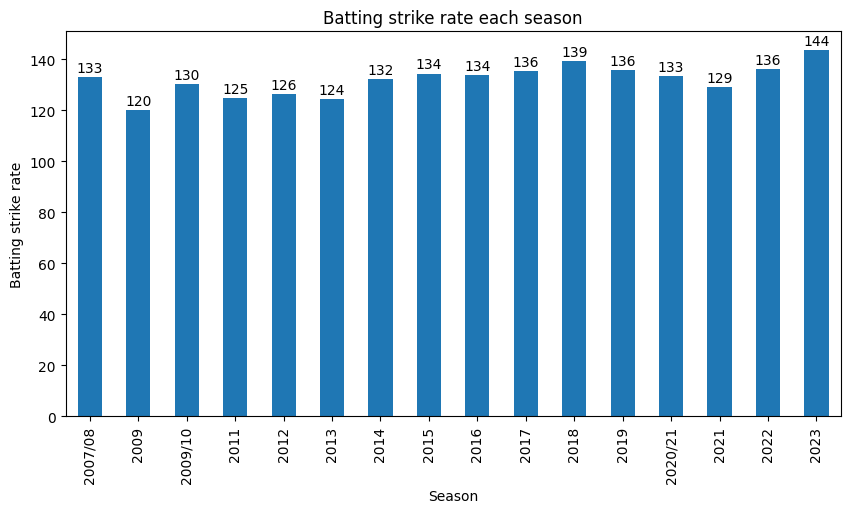

In [73]:
x = data_merged[["season", "total_runs"]].groupby(by = ["season"]).sum()*100/data_merged[["season", "total_runs"]].groupby(by = ["season"]).count()
ax = x.plot.bar(figsize = (10,5))
ax.get_legend().set_visible(False)

for bar in ax.containers[0]:
    value = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, value + 2, f'{value:.0f}', ha ='center')

plt.xlabel('Season')
plt.ylabel('Batting strike rate')
plt.title('Batting strike rate each season')
plt.show()

# Top 10 Batsmen 

In [74]:
# Group by batsman and calculate total runs
df25 = df.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')
df25

,batter,Runs
0,A Ashish Reddy,280
1,A Badoni,399
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
629,Yashpal Singh,47
630,Younis Khan,3
631,Yudhvir Singh,1
632,Yuvraj Singh,2746


In [75]:
# Sort the dataframe by Runs in descending order
df25 =df25.sort_values(by='Runs', ascending=False)
df25

,batter,Runs
595,V Kohli,7223
486,S Dhawan,6613
138,DA Warner,6383
453,RG Sharma,6213
517,SK Raina,5467
...,...,...
588,U Kaul,0
242,JL Denly,0
596,V Pratap Singh,0
110,C Nanda,0


In [76]:
# Select top 10 batsmen
df25 = df25.head(10)

In [77]:
# Print top 10 batsmen
print('The Top 10 Batsmen in the Tournament are:\n', df25)

The Top 10 Batsmen in the Tournament are:
              batter  Runs
595         V Kohli  7223
486        S Dhawan  6613
138       DA Warner  6383
453       RG Sharma  6213
517        SK Raina  5467
27   AB de Villiers  5127
356        MS Dhoni  5059
116        CH Gayle  4953
475      RV Uthappa  4923
269      KD Karthik  4448


C:\Users\vivek\AppData\Local\Temp\ipykernel_10548\220090497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df25, y='batter', x='Runs', palette=colors)


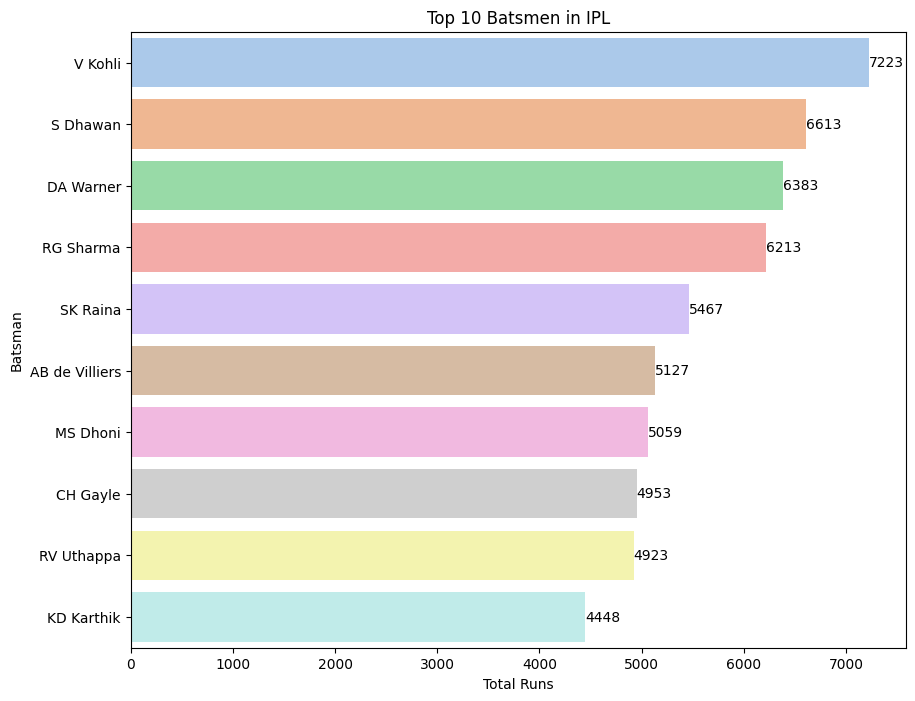

In [78]:
# Plotting

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=df25, y='batter', x='Runs', palette=colors)

# Add annotations
for index, value in enumerate(df25['Runs']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen in IPL')

# Show the plot
plt.show()